In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install tensorflow==1.15
!pip install keras==2.3

     |████████████████████████████████| 412.3MB 42kB/s 
     |████████████████████████████████| 512kB 53.8MB/s 
     |████████████████████████████████| 3.8MB 50.0MB/s 
     |████████████████████████████████| 51kB 9.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=da8cef800efdcb626aa3b8ed5a0656765c0ab0f8406ef7dfaf8a8d27992187ec
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninsta

In [5]:
!cp -r /content/drive/MyDrive/data /content

In [6]:
!mkdir pretrained
%cd pretrained

/content/pretrained


In [7]:
!wget http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz

!tar -xvf ssd_inception_v2_coco_2017_11_17.tar.gz

!rm *.gz
!ls

!echo "ssd_inception_v2_coco_2017_11_17"
%cd ssd_inception_v2_coco_2017_11_17
!ls

--2021-01-02 07:09:00--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.73.240, 2607:f8b0:4004:82a::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.73.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278126337 (265M) [application/x-tar]
Saving to: ‘ssd_inception_v2_coco_2017_11_17.tar.gz’

ssd_inception_v2_co 100%[===================>] 265.24M  73.3MB/s    in 3.6s    

2021-01-02 07:09:04 (73.3 MB/s) - ‘ssd_inception_v2_coco_2017_11_17.tar.gz’ saved [278126337/278126337]

--2021-01-02 07:09:04--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... 

In [10]:
%cd /content/pretrained
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_mobilenet_v2_coco_2018_03_29.pbtxt

!tar -xvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

!rm *.gz
!ls

!echo "ssd_mobilenet_v2_coco_2018_03_29"
%cd ssd_mobilenet_v2_coco_2018_03_29
!ls

/content/pretrained
--2021-01-02 07:27:21--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.73.240, 2607:f8b0:4004:82a::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.73.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M   257MB/s    in 0.7s    

2021-01-02 07:27:21 (257 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]

--2021-01-02 07:27:21--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_mobilenet_v2_coco_2018_03_29.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151

In [8]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

***ssd based inception model single image detection***

Detection time 3.32 sec


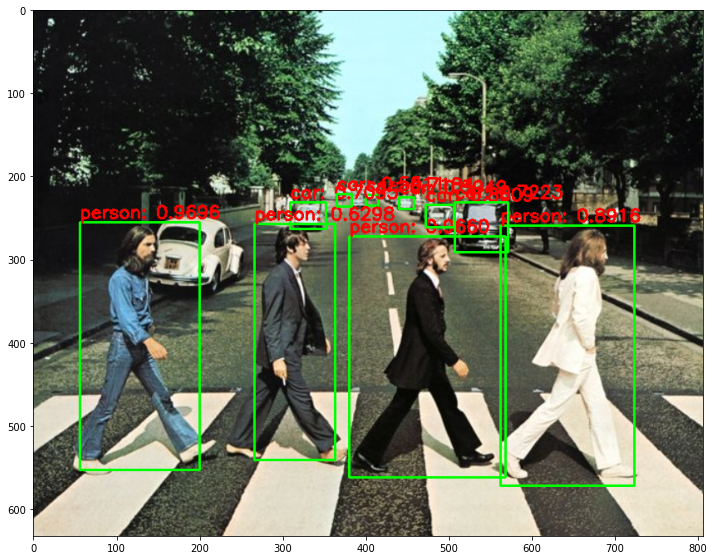

In [13]:
import numpy as np
import tensorflow as tf
import cv2
import time
import matplotlib.pyplot as plt
import os
%matplotlib inline

default_dir = '/content'
default_ssd_dir = '/content/pretrained/ssd_inception_v2_coco_2017_11_17'

with tf.gfile.FastGFile(os.path.join(default_ssd_dir, 'frozen_inference_graph.pb'), 'rb') as f:
  graph_def = tf.GraphDef()
  graph_def.ParseFromString(f.read())

with tf.Session() as sess:
  sess.graph.as_default()
  tf.import_graph_def(graph_def, name='')
  # for n in sess.graph.get_operations():
  #   print(n.name)
  img = cv2.imread(os.path.join(default_dir, 'data/image/beatles01.jpg'))
  draw_img = img.copy()
  rows, cols = img.shape[:2]

  # opencv와 달리 tensorflow는 직접 resize해줘야
  inp = cv2.resize(img, (300, 300))
  inp = inp[:, :, [2, 1, 0]]

  start = time.time()
  out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                  sess.graph.get_tensor_by_name('detection_scores:0'),
                  sess.graph.get_tensor_by_name('detection_boxes:0'),
                  sess.graph.get_tensor_by_name('detection_classes:0')],
                  feed_dict = {'image_tensor:0':inp.reshape(1, inp.shape[0], inp.shape[1], 3)})
  green_color = (0, 255, 0)
  red_color = (0, 0, 255)

  # bbox visualization
  num_detections = int(out[0][0])
  for i in range(num_detections):
    class_id = int(out[3][0][i])
    score = float(out[1][0][i])
    bbox = [float(v) for v in out[2][0][i]]
    if score > 0.4:
      left = int(bbox[1] * cols)
      top = int(bbox[0] * rows)
      right = int(bbox[3] * cols)
      bottom = int(bbox[2] * rows)
      
      caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
      cv2.rectangle(draw_img, (left, top), (right, bottom), green_color, 2)
      cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)
  
  print('Detection time', round(time.time()-start, 2), 'sec')

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

single image detection function

In [15]:
def get_tensor_detected_image(sess, img_array, use_copied_array):
  
  rows, cols = img_array.shape[:2]
  
  if use_copied_array:
    draw_img = img_array.copy()
  else:
    draw_img = img_array
  
  inp = cv2.resize(img_array, (300, 300))
  inp = inp[:, :, [2, 1, 0]]

  start = time.time()

  out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                  sess.graph.get_tensor_by_name('detection_scores:0'),
                  sess.graph.get_tensor_by_name('detection_boxes:0'),
                  sess.graph.get_tensor_by_name('detection_classes:0')],
                  feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})
  green_color = (0, 255, 0)
  red_color = (0, 0, 255)

  # bbox visualization
  num_detections = int(out[0][0])    
  for i in range(num_detections):
    class_id = out[3][0][i]
    score =  out[1][0][i]
    bbox = [float(v) for v in out[2][0][i]]
    if score > 0.4:
      left = int(bbox[1]*cols)
      top = int(bbox[0]*rows)
      right = int(bbox[3]*cols)
      bottom = int(bbox[2]*rows)

      caption = '{}: {:.4f}'.format(labels_to_names[class_id], score)
      cv2.rectangle(draw_img, (left, top), (right, bottom), green_color, 2)
      cv2.putText(draw_img, caption, (left ,top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)

  print('Detection time: ', round(time.time()-start, 2), 'sec')
  return draw_img

Detection time:  3.38 sec


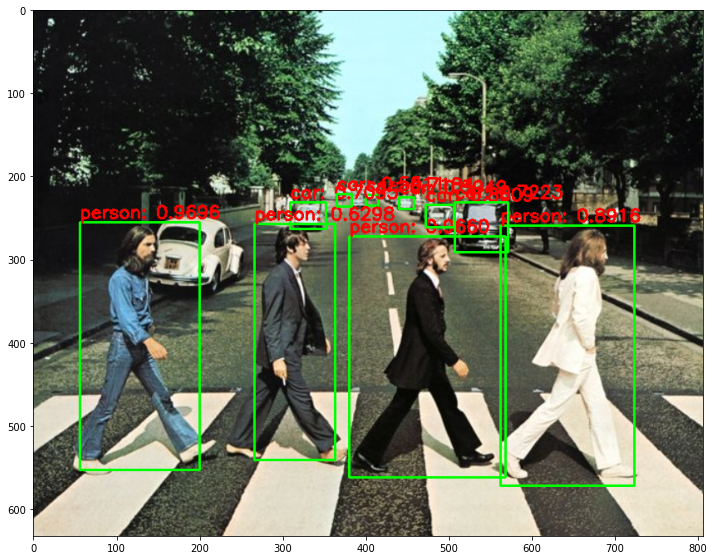

In [16]:
with tf.gfile.FastGFile(os.path.join(default_ssd_dir, 'frozen_inference_graph.pb'), 'rb') as f:
  graph_def = tf.GraphDef()
  graph_def.ParseFromString(f.read())

with tf.Session() as sess:
  sess.graph.as_default()
  tf.import_graph_def(graph_def, name='')

  img = cv2.imread(os.path.join(default_dir, 'data/image/beatles01.jpg'))
  draw_img = get_tensor_detected_image(sess, img, True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

***Video Object Detection***

In [18]:
video_input_path = os.path.join(default_dir, 'data/video/John_Wick_small.mp4')
video_output_path = os.path.join(default_dir, 'data/output/John_Wick_small.mp4')

cap = cv2.VideoCapture(video_input_path)
codec = cv2.VideoWriter_fourcc(*'XVID')
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = cap.get(cv2.CAP_PROP_FPS)

vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)

frame_cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print('Total Frame count:', frame_cnt)

green_color=(0, 255, 0)
red_color=(0, 0, 255)

with tf.gfile.FastGFile(os.path.join(default_ssd_dir, 'frozen_inference_graph.pb'), 'rb') as f:
  graph_def = tf.GraphDef()
  graph_def.ParseFromString(f.read())

with tf.Session() as sess:
  sess.graph.as_default()
  tf.import_graph_def(graph_def, name='')
  index=0
  while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
      print('No more Frame')
      break
    
    draw_img_frame = get_tensor_detected_image(sess, img_frame, False)
    vid_writer.write(draw_img_frame)

vid_writer.release()
cap.release()

Total Frame count: 58.0
Detection time:  3.82 sec
Detection time:  0.11 sec
Detection time:  0.1 sec
Detection time:  0.1 sec
Detection time:  0.1 sec
Detection time:  0.09 sec
Detection time:  0.1 sec
Detection time:  0.09 sec
Detection time:  0.09 sec
Detection time:  0.09 sec
Detection time:  0.1 sec
Detection time:  0.1 sec
Detection time:  0.1 sec
Detection time:  0.09 sec
Detection time:  0.1 sec
Detection time:  0.1 sec
Detection time:  0.09 sec
Detection time:  0.11 sec
Detection time:  0.09 sec
Detection time:  0.11 sec
Detection time:  0.09 sec
Detection time:  0.11 sec
Detection time:  0.1 sec
Detection time:  0.09 sec
Detection time:  0.09 sec
Detection time:  0.1 sec
Detection time:  0.09 sec
Detection time:  0.1 sec
Detection time:  0.09 sec
Detection time:  0.1 sec
Detection time:  0.1 sec
Detection time:  0.1 sec
Detection time:  0.1 sec
Detection time:  0.1 sec
Detection time:  0.09 sec
Detection time:  0.1 sec
Detection time:  0.09 sec
Detection time:  0.1 sec
Detecti